<a href="https://colab.research.google.com/github/florinOK/amr/blob/colab/vae-mnist/vae-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test),  28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9241 - val_loss: 0.1343 - val_accuracy: 0.9593
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1149 - accuracy: 0.9656 - val_loss: 0.0949 - val_accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9767 - val_loss: 0.0875 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0741 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0771 - val_accuracy: 0.9760


predicted: [1]
true:


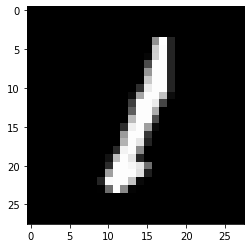

In [28]:
picture = x_test[np.random.choice(len(x_test))]

picture = np.reshape(picture, (1, 28, 28, 1))
probs = model.predict(picture)
prediction = np.argmax(probs, axis=1)
print(f'predicted: {prediction}')

picture = np.reshape(picture, (28, 28))
plt.imshow(picture, cmap='gray')
print('true:')